# Read PDF to TXT

Author lds217


# PDF to PNG

In [23]:
from pdf2image import convert_from_path

images = convert_from_path('data/a.pdf', poppler_path = r"D:\Dat\Github\OCR\bin\poppler-24.07.0\Library\bin")

for i in range(len(images)):
    images[i].save('data/converted/page'+ str(i) +'.jpg', 'JPEG')

# Clean PNG

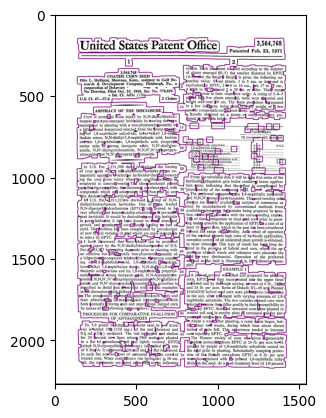

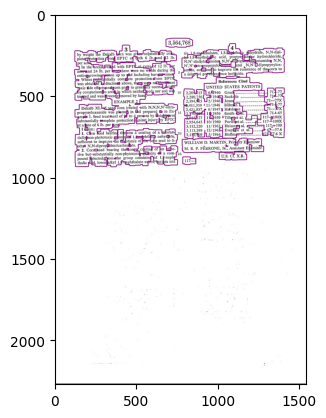

In [28]:
# Color drawings are acceptable in US patent applications, but not in international applications (see PCT Rule 11.13).
# https://github.com/pankajr141/experiments/blob/master/Reasoning/ComputerVision/opencv%20tricks%20-%20segmenting%20pdf%20contents.ipynb
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
a = 0
folder_path = 'data/converted'
for index, filename in enumerate(os.listdir(folder_path)):
    image_path = os.path.join(folder_path, filename)
    img = cv2.imread(image_path)

    img_ = 255 - img      # Reversing scales of RGB image
    img_[img_ < 128] = 0   # Removing pixel with low brightness


    # Remove Lines from our image
    kernel = np.ones((3, 3), np.uint8)
    img_erosion = cv2.erode(img_, kernel, iterations=1)

    # grouping Elements which are near
    kernel = np.ones((5, 5), np.uint8)
    img_dilation = cv2.dilate(img_erosion, kernel, iterations=8)

    gray = cv2.cvtColor(img_dilation, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cv2.drawContours(img, contours, -1, (127, 12, 123), 3)
    cv2.imwrite('data/convertedprocess/page'+ str(a) +'.jpg', img)
    a+=1
    plt.figure()
    plt.imshow(img)


plt.show()

# Read text with tesseract

In [10]:
import os
from PIL import Image
import pytesseract

all_text = ""
folder_path = 'data/converted'
for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    text = pytesseract.image_to_string(Image.open(image_path))
    all_text += f"Text from {filename}:\n{text}\n\n"

output_file = 'output_tesseract_without_pre.txt'
with open(output_file, 'w', encoding='utf-8') as f:
    f.write(all_text)

# same result withou pre-processing


# Chat GPT

In [28]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [9]:
with open("output_tesseract.txt", "r", encoding='utf-8-sig') as f:
    string = f.read()
string

'Text from page0.jpg:\nUnited States Patent Office\n\n3,564,768\nPatented Feb. 23, 1971\n\ni\n\n3,564,768\nCOATED CORN SEED\nOtto L. Hoffman, Shawnee, Kans,, assignor to Gulf Re-\nsearch & Development Company, Pittsburgh, Pa., a\ncorporation of Delaware 5\nNo Drawing. Filed Oct. 25, 1968, Ser. No. 770,856\nInt. Cl. AOke 1/06 .\nUS. Cl. 47—57.6 2 Claims\n\n10\nABSTRACT OF THE DISCLOSURE\n\nCorn is protected from injury by N,N-dialkylthiolcar-\nbamate ester pre-emergent herbicides by coating the corn\nseeds prior to planting with a non-phytotoxic quantity of\na bifunctional compound selected from the group consist-\ning of 1,8-naphthalic anhydride, lower alkyl 1,8-naph-\nthalate esters, N,N-diallyl-1,8-naphthalamic acid, barium\nand tin 1,8-naphthalates, 1,8-naphthalic acid, propynyl-\namine salts of strong inorganic acids, N,N’-diallylox-\namide, N,N’-dipropynyloxamide, N,N,N’,N’-tetrapropyn-\nyloxamide and N,N’-dipropynylmalonamide.\n\n16\n\n20\n\nIn U.S. Pat. 3,131,509 there is disclo

In [11]:
from openai import OpenAI
import os

key = os.getenv("OPEN_AI_KEY")
client = OpenAI(
    api_key=key,
)

def chat_gpt(prompt):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": "can you help my summarize this document?" + prompt}]
    )
    return response.choices[0].message.content.strip()

print(chat_gpt(string))

The document is a United States patent for a method of protecting corn plants from injury caused by pre-emergent herbicides. The method involves coating the corn seeds with specific compounds before planting. The compounds listed include 1,8-naphthalic acid, barium naphthalate, and propynylamine hydrochloride, among others. The document includes a test procedure for evaluating the effectiveness of these compounds and provides specific examples of their application in the field. The results show that certain compounds provide protection against herbicide injury without causing toxic side effects or affecting corn growth. The patent claims outline the specific compounds and quantities needed to improve corn seed resistance to herbicides. Various references to previous patents are also included in the document.
